In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore") 

## Load dataset

In [2]:
df = pd.read_csv("Customer_Data.csv")

## EDA (Exploratory Data Analysis)

In [3]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [4]:
# profile.to_file("report.html")
# profile

### Display general information about the dataset

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [9]:
df.shape

(8950, 18)

In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [12]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [14]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         206
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

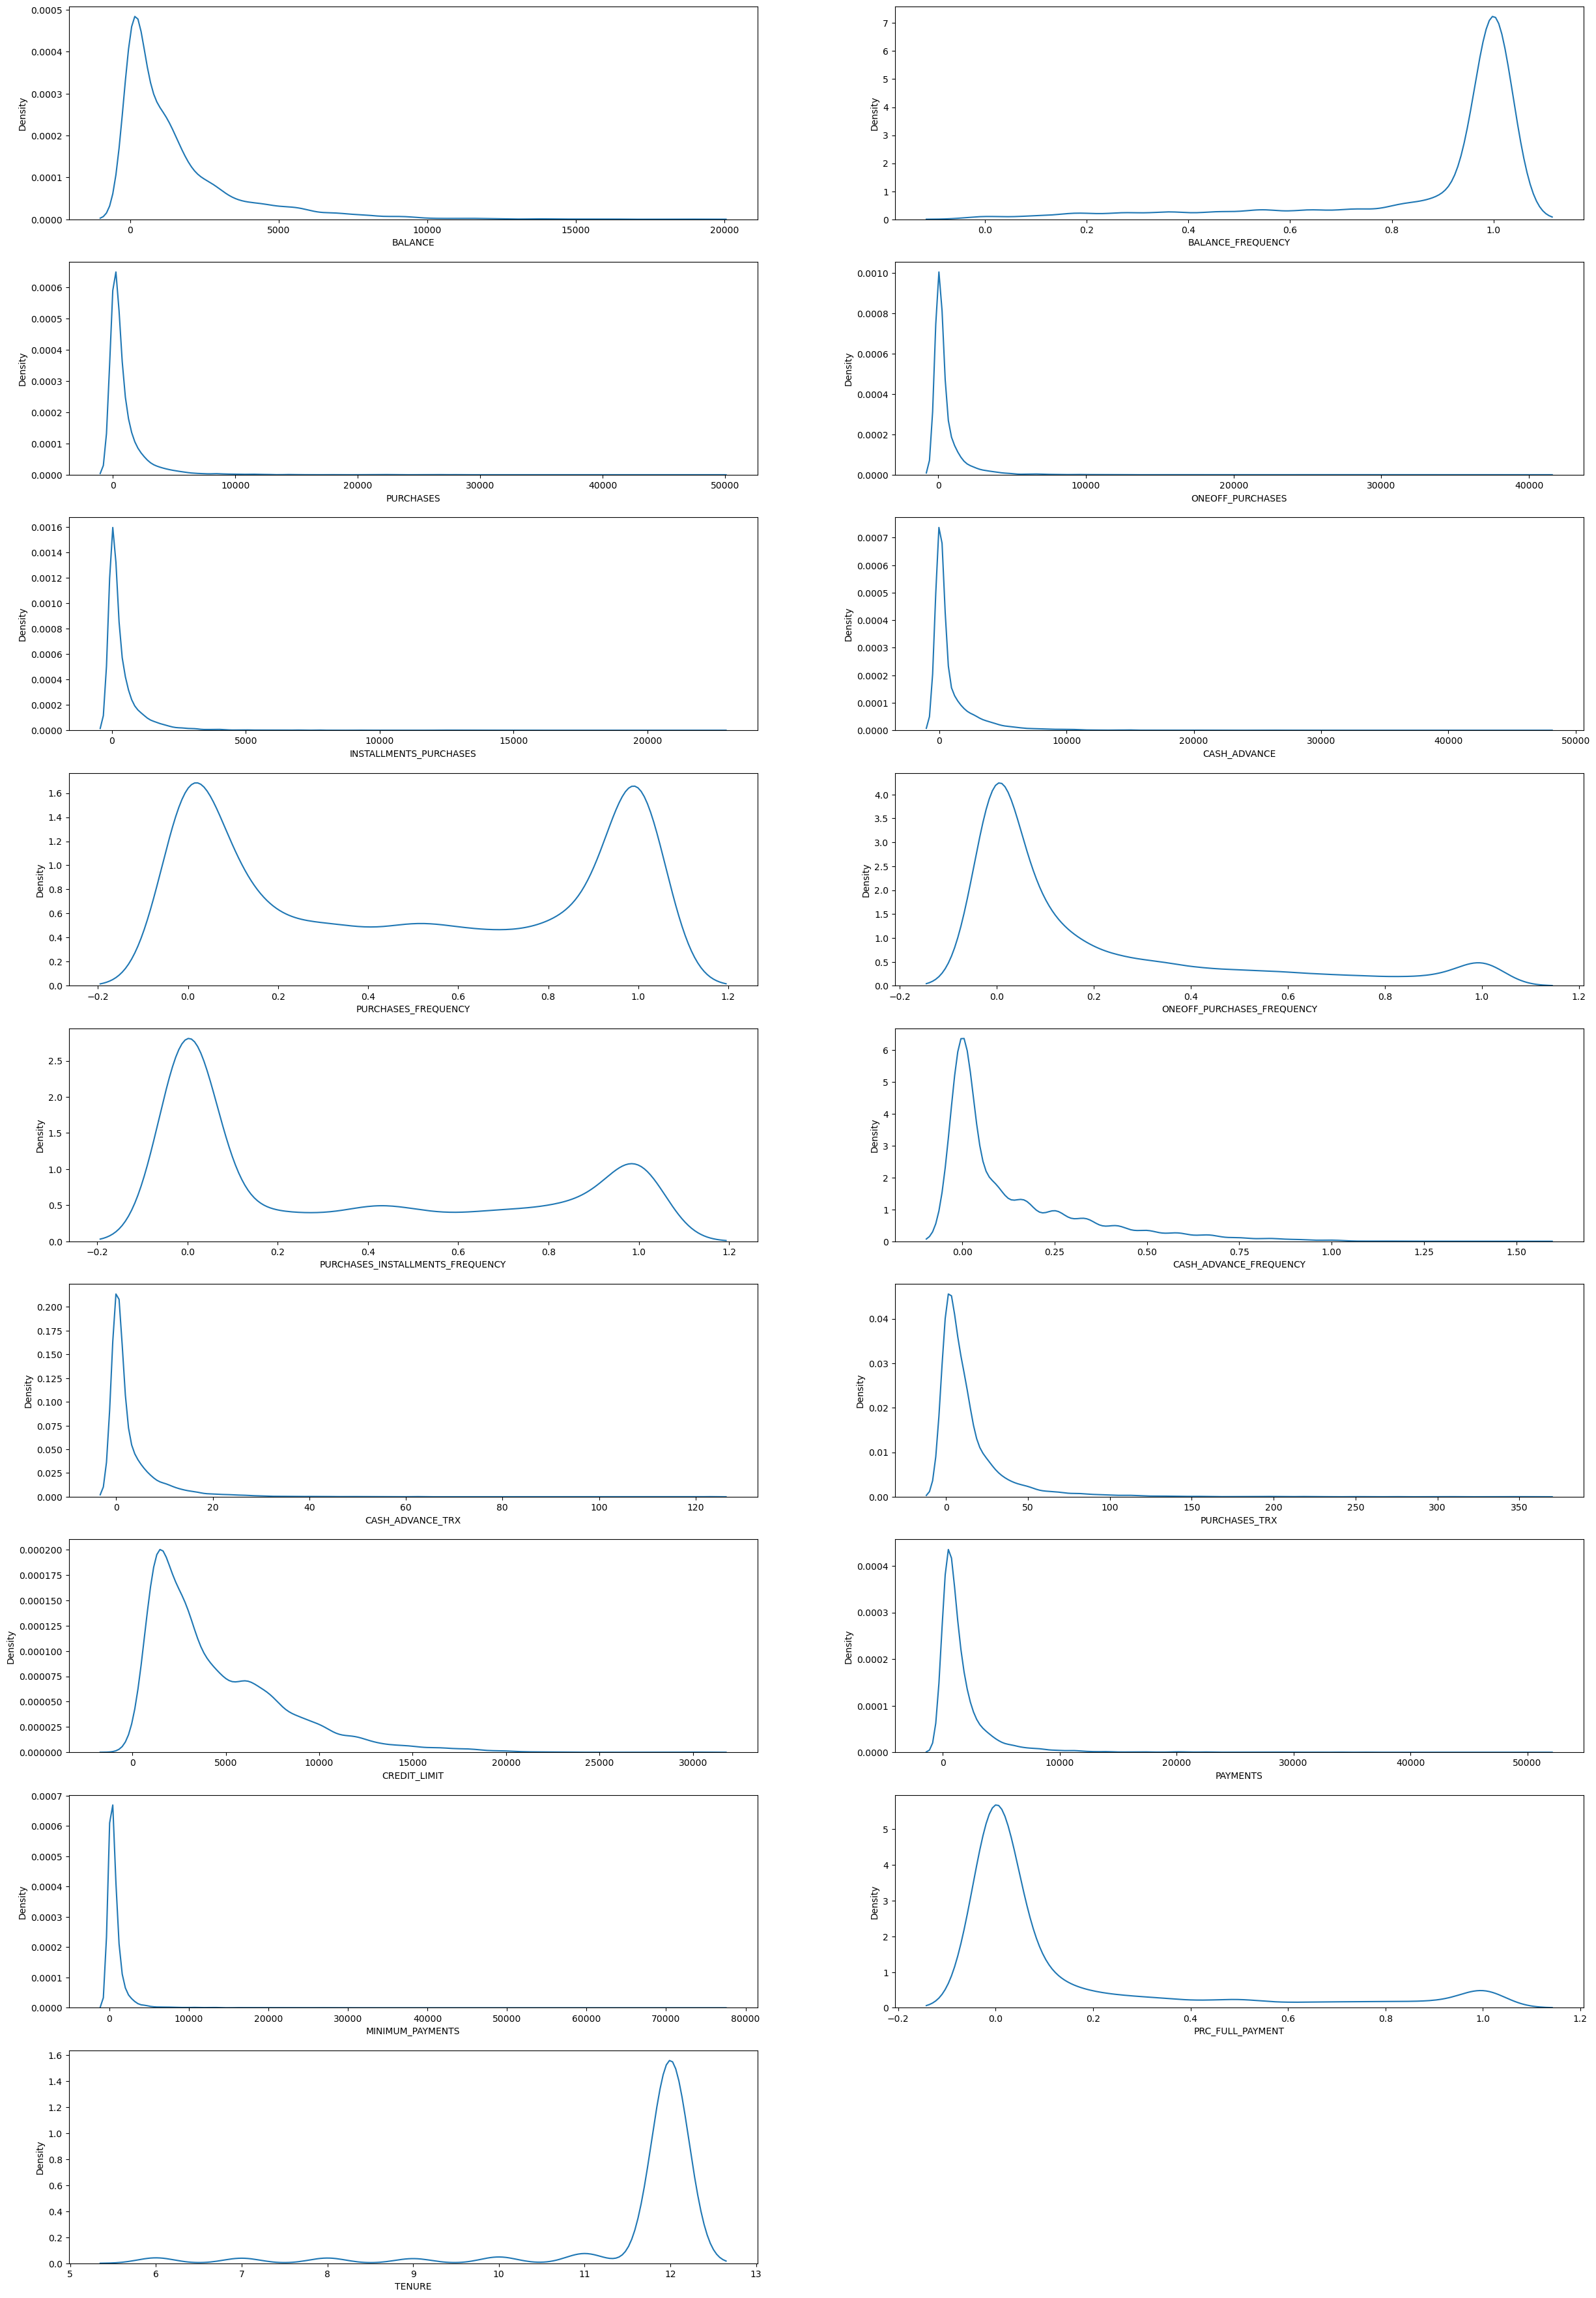

In [17]:
plt.figure(figsize=(30, 45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col],ax=ax)
        plt.xlabel(col)
plt.show()

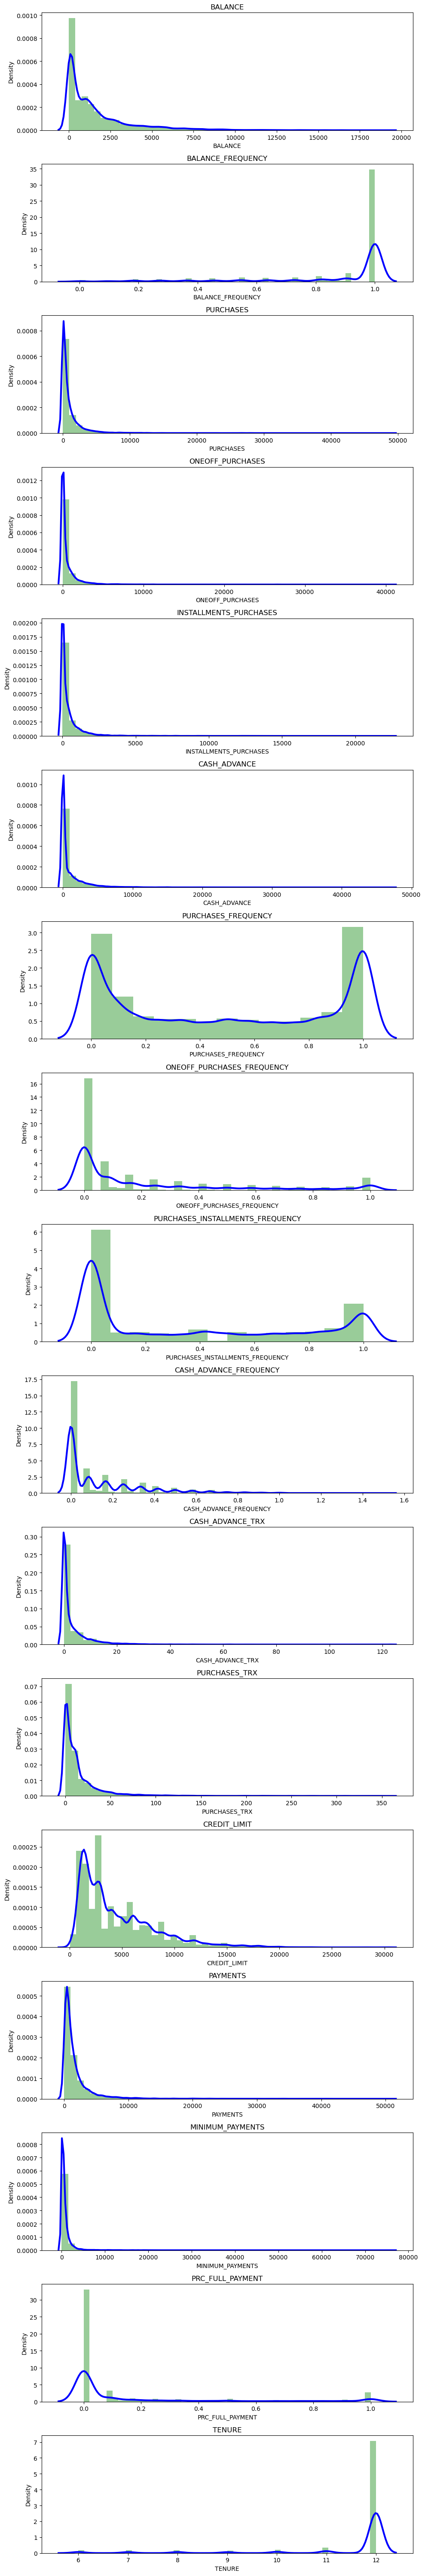

In [18]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

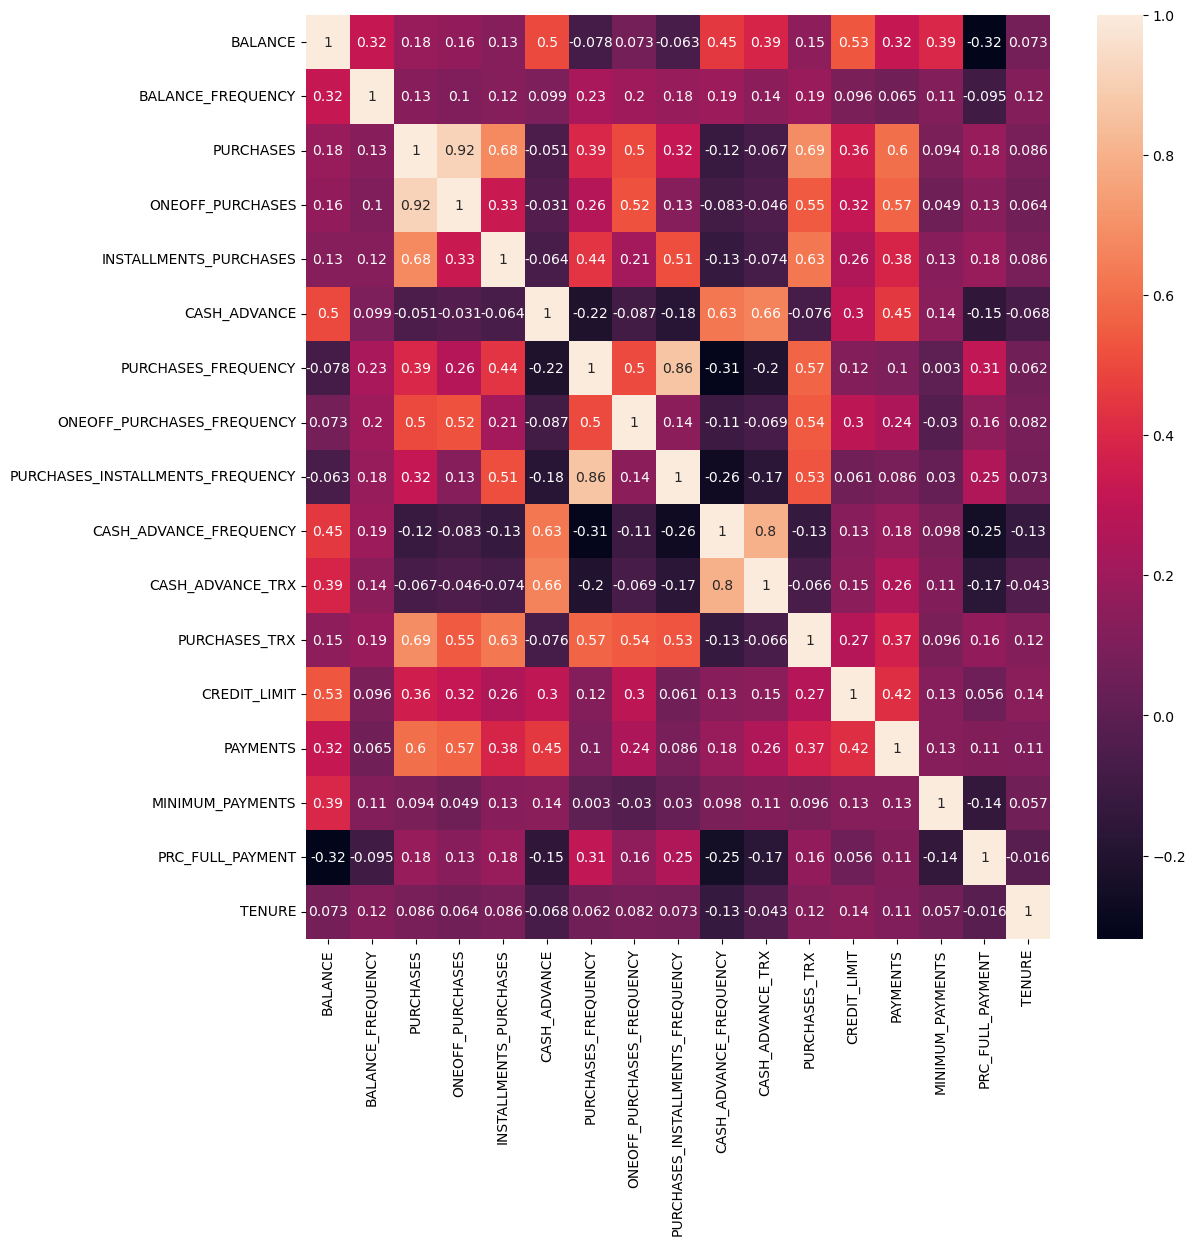

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data Preprocessing

### Scale the data

In [20]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

### Dimensionality reduction

Convert the data to 2D using PCA to visualize the data

In [21]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682222,-1.076451
1,-1.138304,2.506473
2,0.969696,-0.383542
3,-0.873631,0.043165
4,-1.599434,-0.688580
...,...,...
8945,-0.359629,-2.016141
8946,-0.564367,-1.639118
8947,-0.926203,-1.810781
8948,-2.336553,-0.657954


### Find the optimal number of clusters using the elbow method

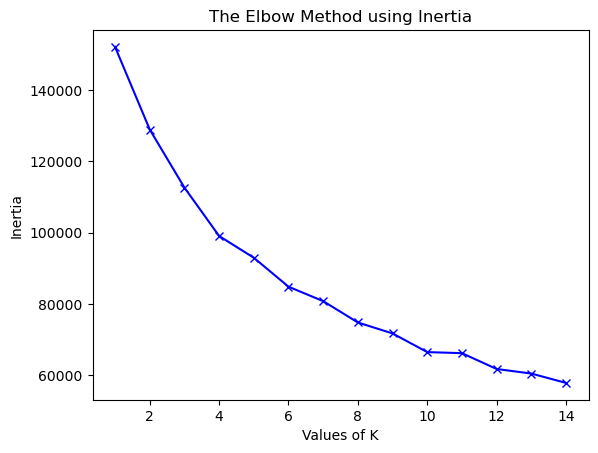

In [22]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

## Using KMeans

#! try 11 clusters

In [23]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'CLUSTER':kmeans_model.labels_})],axis=1)

## Visualize the clusters

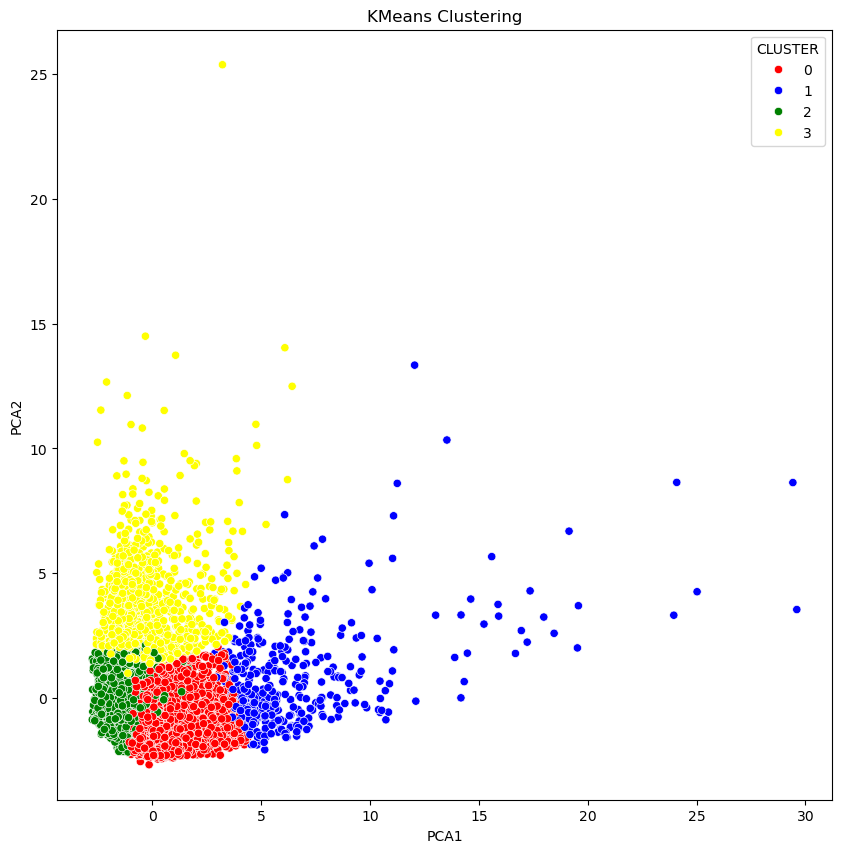

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='PCA1',y='PCA2',hue='CLUSTER',data=pca_df_kmeans,palette=['red','blue','green','yellow'])
plt.title('KMeans Clustering')
plt.show()

In [25]:
centroids = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the centroids to get the actual values
centroids = scalar.inverse_transform(centroids)
centroids = pd.DataFrame(data=centroids,columns=[df.columns])
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,890.526458,0.934379,1229.977441,590.034325,640.217574,209.297616,0.884592,0.296196,0.711238,0.042463,0.787158,21.997919,4205.966187,1326.579256,648.425404,0.269176,11.594233
1,3538.323234,0.987068,7628.896482,5057.499133,2572.843133,650.374765,0.946992,0.737181,0.789518,0.070460,2.065060,89.000000,9661.566265,7229.381878,1967.004778,0.287582,11.951807
2,1012.351005,0.789911,269.800322,209.902555,60.165058,596.359298,0.169751,0.086305,0.080176,0.114949,2.127644,2.898288,3277.554830,975.038698,586.721088,0.077828,11.445871
3,4601.214652,0.968442,503.252902,320.970734,182.366964,4518.911273,0.288255,0.139165,0.185987,0.484470,14.279399,7.677231,7546.667678,3482.883797,2007.157923,0.034830,11.387823


In [26]:
clustered_df = pd.concat([df,pd.DataFrame({'CLUSTER':kmeans_model.labels_})],axis=1)
clustered_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,2


In [27]:
cluster_1 = clustered_df[clustered_df['CLUSTER']==0]
cluster_1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
2,2495.148862,1.0,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,0
5,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,0
7,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,0
10,1293.124939,1.0,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,0
12,1516.928620,1.0,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,0


In [28]:
cluster_2 = clustered_df[clustered_df['CLUSTER']==1]
cluster_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
6,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
21,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,1
57,2386.330629,1.0,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,1
84,1935.362486,1.0,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,1
90,9381.255094,1.0,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,1


In [29]:
cluster_3 = clustered_df[clustered_df['CLUSTER']==2]
cluster_3.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,2
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12,2
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.0,12,2


In [30]:
cluster_4 = clustered_df[clustered_df['CLUSTER']==3]
cluster_4.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,3
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,3


## plot the clusters

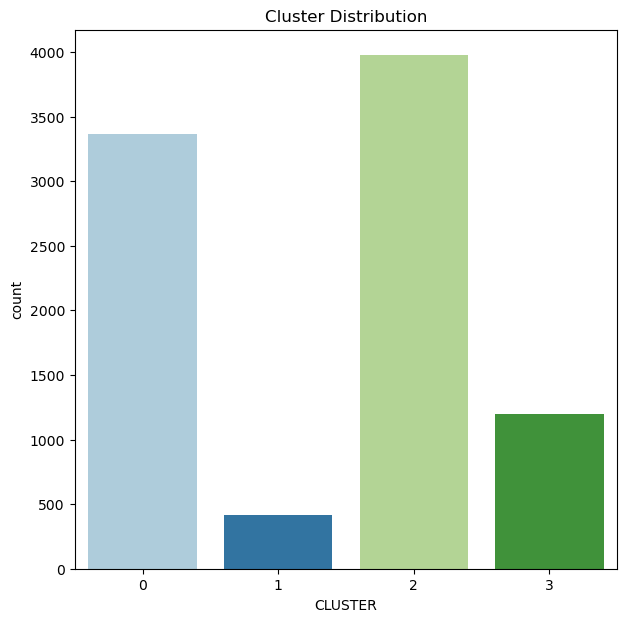

In [31]:
plt.figure(figsize=(7,7))
sns.countplot(x='CLUSTER',data=clustered_df, palette='Paired')
plt.title('Cluster Distribution')
plt.show()

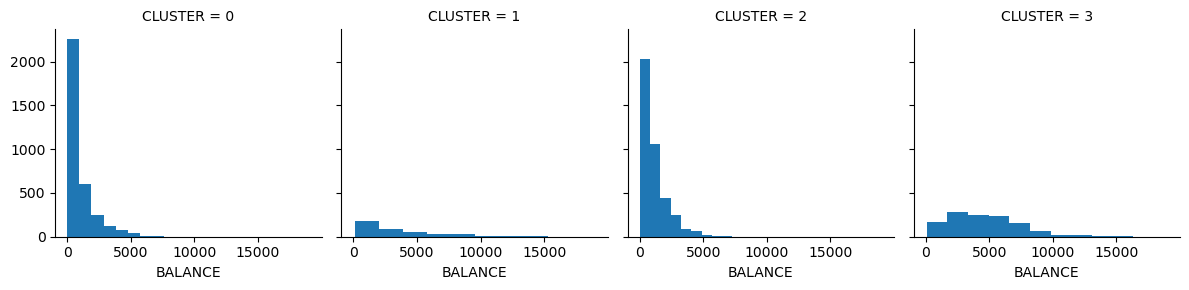

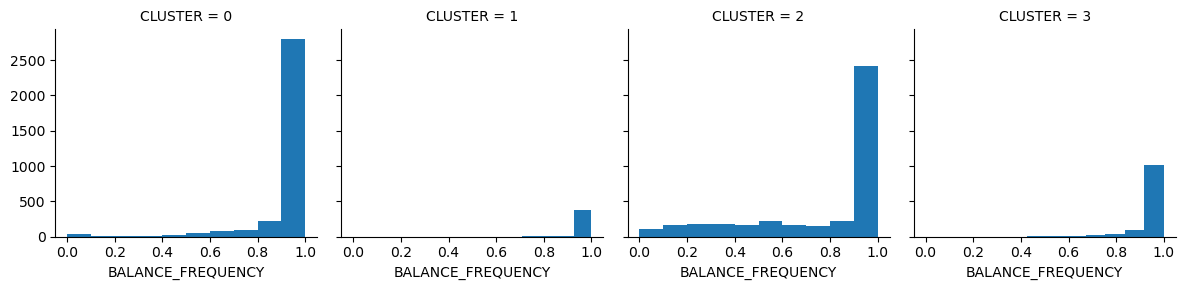

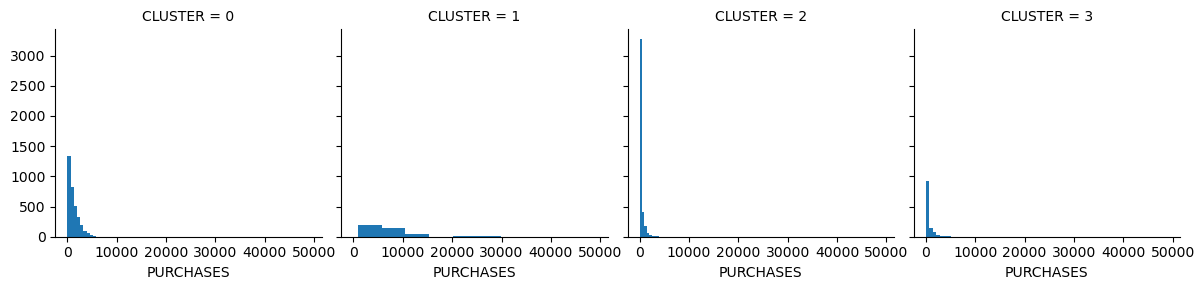

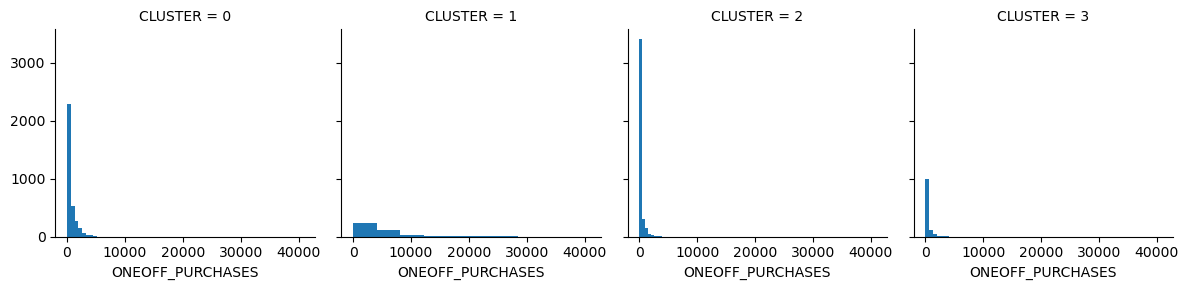

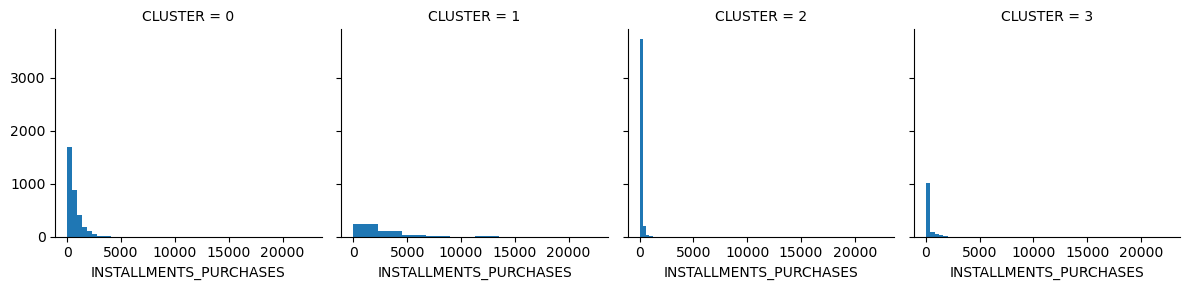

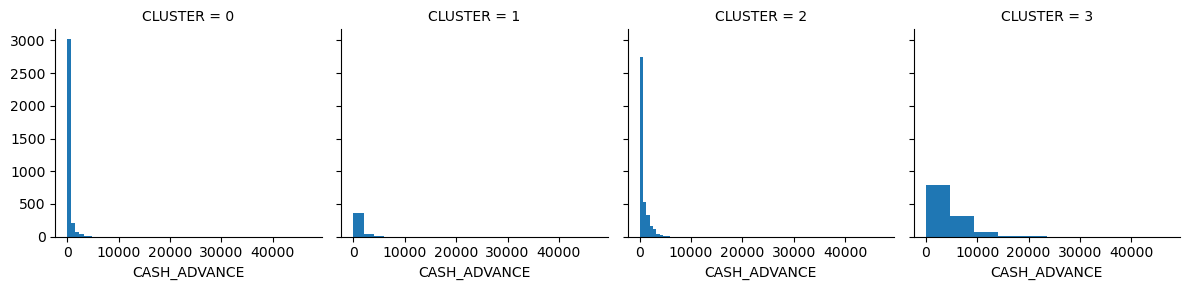

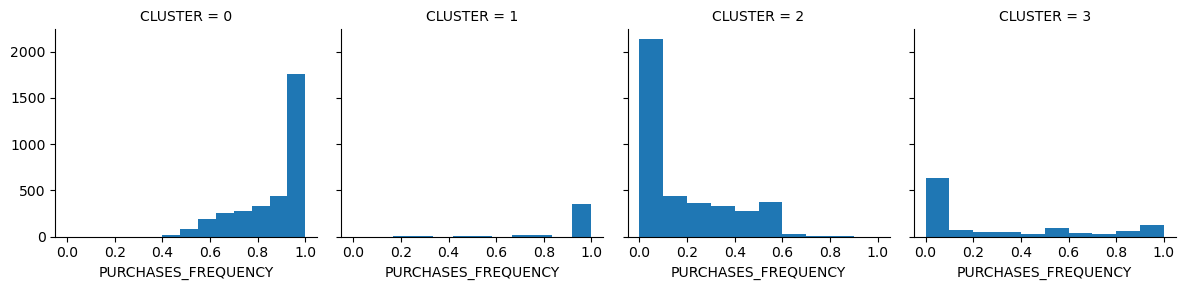

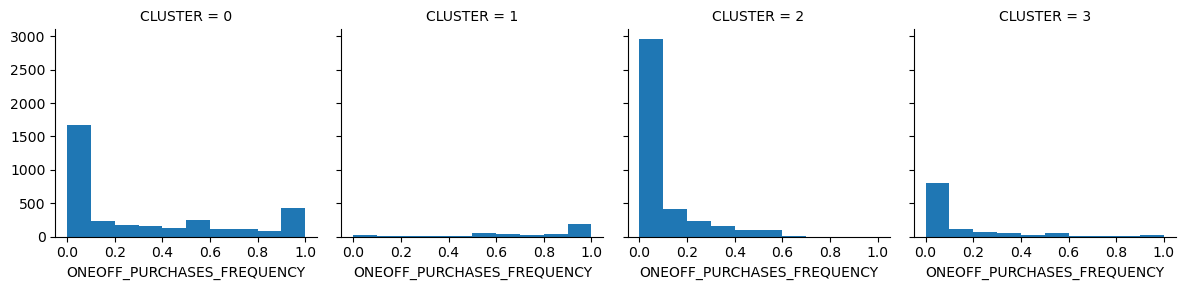

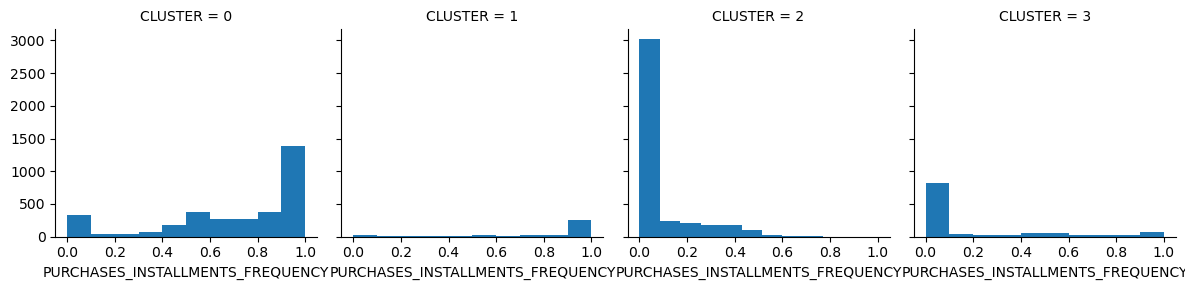

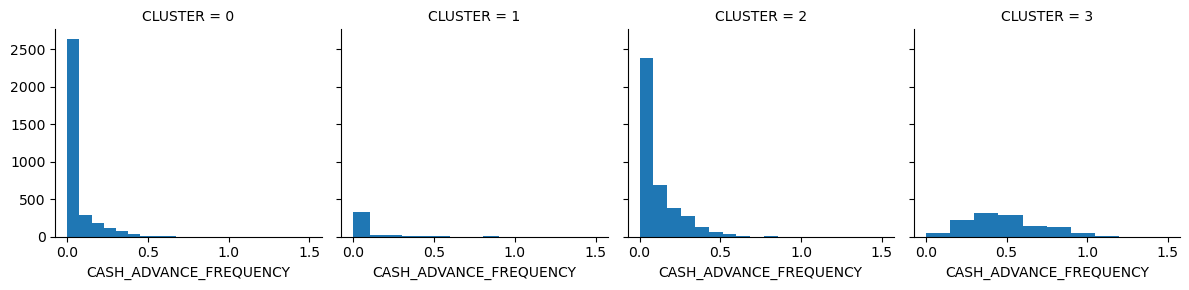

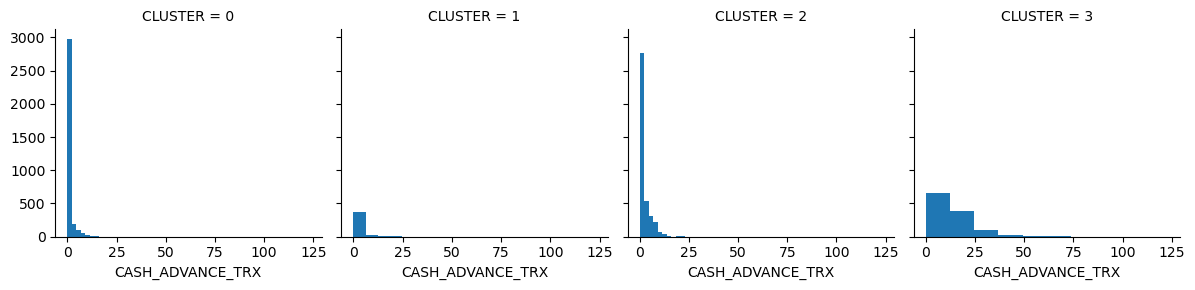

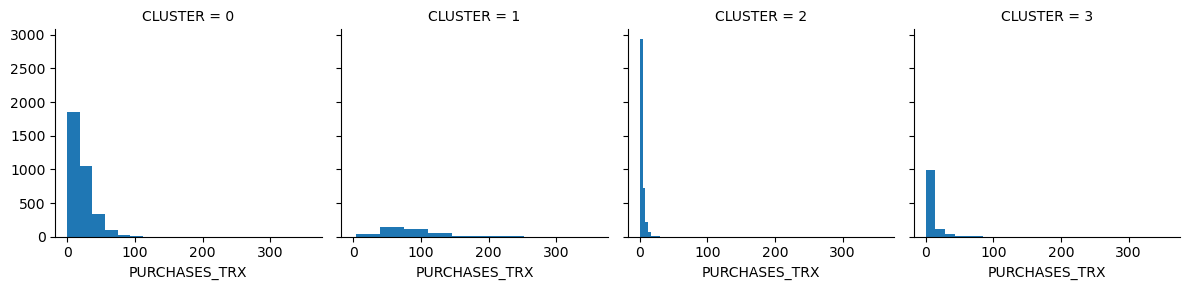

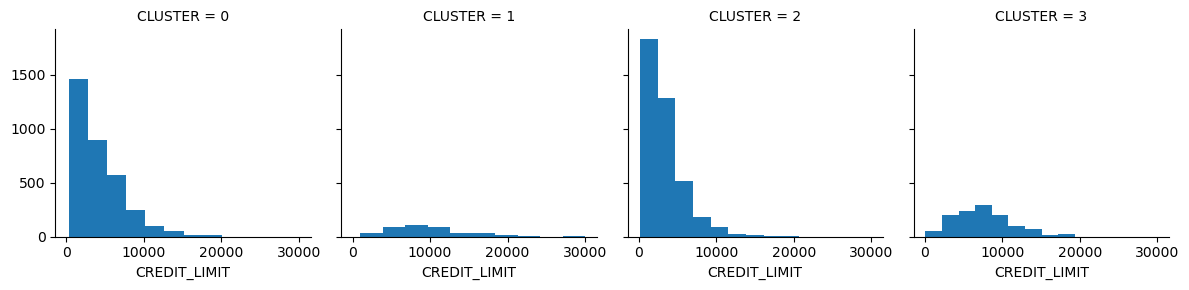

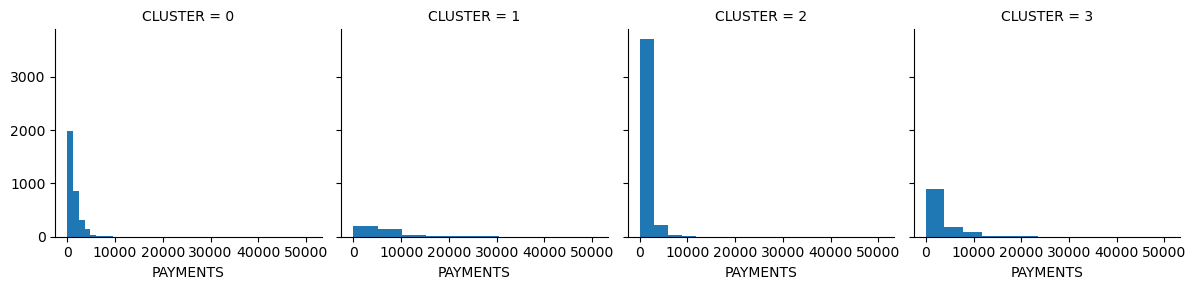

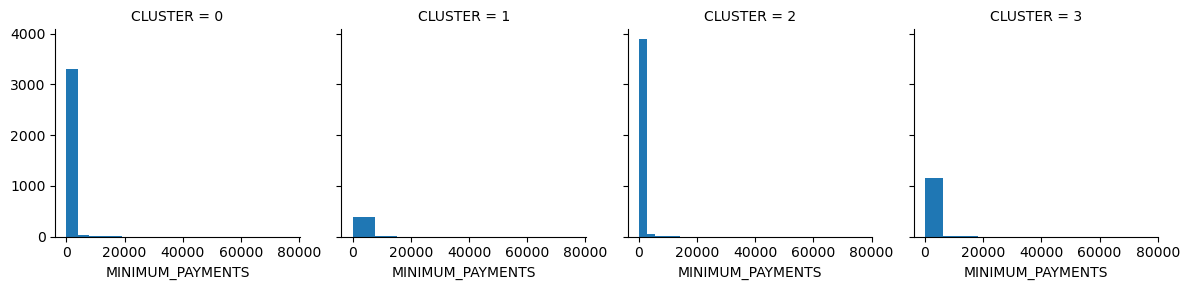

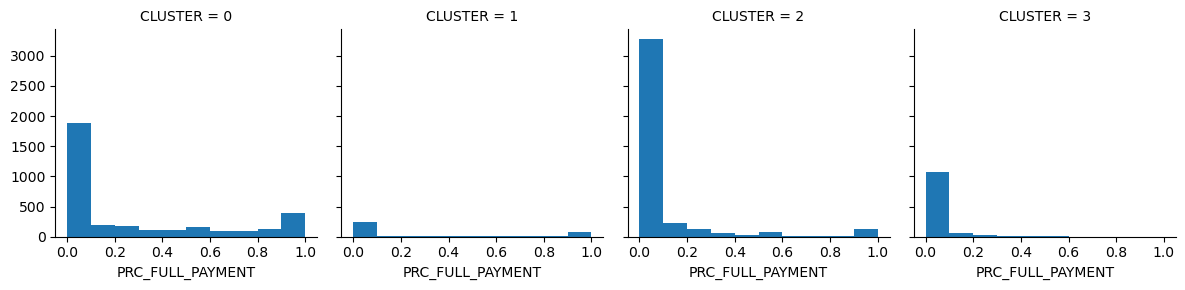

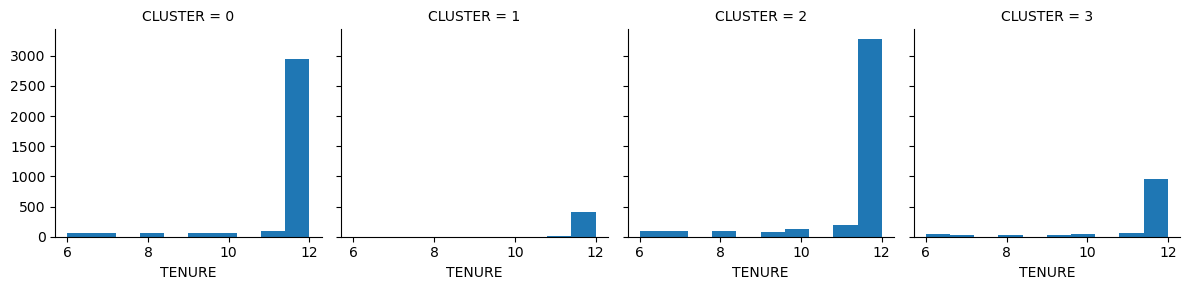

In [32]:
for c in clustered_df.drop(['CLUSTER'],axis=1):
    grid= sns.FacetGrid(clustered_df, col='CLUSTER')
    grid= grid.map(plt.hist, c)
plt.show()

## Save the model

In [33]:
import joblib
joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [52]:
clustered_df.to_csv('clustered_data.csv',index=False)

## Train the model

In [35]:
X = clustered_df.drop(['CLUSTER'],axis=1)
y = clustered_df['CLUSTER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6265, 17), (2685, 17), (6265,), (2685,))

In [37]:
X_train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5831,649.896506,1.000000,4919.76,4353.06,566.70,191.376535,0.916667,0.666667,0.833333,0.166667,3,48,6500.0,4854.340510,219.441278,0.166667,12
2244,2382.328208,1.000000,899.58,413.28,486.30,450.252732,1.000000,0.250000,1.000000,0.166667,4,34,2500.0,850.186851,1212.047288,0.000000,12
4205,1119.157048,1.000000,133.90,133.90,0.00,269.234406,0.166667,0.166667,0.000000,0.250000,3,3,1200.0,427.355150,320.855529,0.000000,12
7933,0.000000,0.000000,136.80,0.00,136.80,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2700.0,127.996550,864.206542,0.000000,12
8462,20.620429,0.818182,169.66,0.00,169.66,0.000000,0.750000,0.000000,0.666667,0.000000,0,9,1000.0,192.185764,145.811693,1.000000,12


In [38]:
X_test.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7669,16.834929,0.454545,15.00,15.00,0.00,209.025389,0.090909,0.090909,0.000000,0.090909,1,1,7500.0,430.213001,86.959785,0.000000,11
6125,540.020858,1.000000,612.23,495.61,116.62,1708.923217,0.666667,0.166667,0.500000,0.333333,10,10,2000.0,1642.068707,419.956251,0.000000,12
7028,119.237712,1.000000,342.74,0.00,342.74,0.000000,1.000000,0.000000,1.000000,0.000000,0,20,2000.0,327.166041,165.207233,0.000000,12
3019,894.081947,1.000000,1901.71,1853.11,48.60,206.618780,0.666667,0.666667,0.416667,0.083333,1,33,1500.0,947.130141,220.745296,0.000000,12
3479,1294.145453,1.000000,3059.10,1836.98,1222.12,0.000000,1.000000,0.416667,1.000000,0.000000,0,42,7000.0,5560.033502,497.637767,0.083333,12


## Model development

In [39]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model evaluation

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1005
           1       0.93      0.86      0.90       130
           2       0.95      0.95      0.95      1204
           3       0.87      0.87      0.87       346

    accuracy                           0.93      2685
   macro avg       0.92      0.91      0.92      2685
weighted avg       0.93      0.93      0.93      2685



### Confusion matrix

In [42]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 950    4   33   18]
 [  15  112    2    1]
 [  32    0 1148   24]
 [  11    4   31  300]]


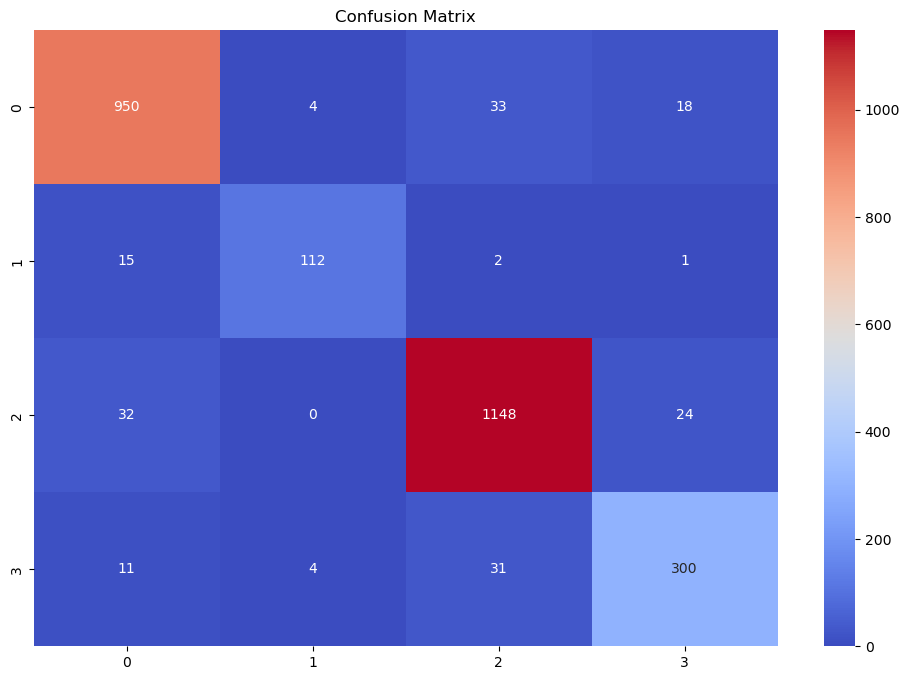

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.show()

### Save classification model

In [50]:
import pickle
pickle.dump(model, open('model.sav', 'wb'))

In [51]:
loaded_model = pickle.load(open('model.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result * 100, '% Accuracy')

93.48230912476723 % Accuracy
